In [ ]:
import os
import warnings
import argparse
import datetime
import pathlib

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

from tqdm import tqdm

from test import test
from utils.evaluate_uncertainty import evaluate_uncertainty
from core.config import create_config, save_config
# from core.dataset import COCODataset
from core.dataset_hotswapped_crop_save import COCODataset
# from core.dataset_hotswapped_composed import COCODataset
from core.model import Model
from core.metrics import AccuracyLogger
import pickle
from SupContrast.losses import SupConLoss
import torch.nn.functional as F
## Initialization

In [2]:
import matplotlib.pyplot as plt

In [4]:
with open('args_hotswapped.p','rb') as File:
    args = pickle.load(File)
args.batch_size = 15
print('Hard mining set to:%s'%(args.hard_mining))
pathlib.Path(args.outdir).mkdir(exist_ok=True, parents=True)
args.batch_size = 50
# Load config or create a new one
cfg = create_config(args)

arbitrary_material_fols = sorted([i for i in os.listdir('../openrooms/') if 'arbitrary' in i])
# new_materials = arbitrary_material_fols[:args.num_materials]
material_fols = [i for i in arbitrary_material_fols if 'repeat' in i]
#  = []
print('Using materials: %s'%material_fols)

# dataset = COCODataset(cfg.annotations, cfg.imagedir, (224,224), material_fols, normalize_means=[0.485, 0.456, 0.406], normalize_stds=[0.229, 0.224, 0.225])
dataset = COCODataset(cfg.annotations, cfg.imagedir, (224,224), material_fols)
dataloader = DataLoader(dataset, batch_size=4, num_workers=4, shuffle=True, pin_memory=True, drop_last=True)

Hard mining set to:none
Using materials: ['main_xml1_arbitrary_many_styles_repeat_0', 'main_xml1_arbitrary_many_styles_repeat_1', 'main_xml1_arbitrary_many_styles_repeat_2', 'main_xml1_arbitrary_many_styles_repeat_3', 'main_xml1_arbitrary_many_styles_repeat_4', 'main_xml1_arbitrary_many_styles_repeat_5', 'main_xml1_arbitrary_many_styles_repeat_6', 'main_xml1_arbitrary_many_styles_repeat_7']
Hotswapped material loader being used.
{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23, 25: 24, 26: 25, 27: 26, 28: 27, 29: 28, 30: 29, 31: 30, 32: 31, 33: 32, 34: 33, 35: 34, 36: 35, 37: 36, 38: 37, 39: 38, 40: 39, 41: 40, 42: 41, 43: 42, 44: 43, 45: 44}
-------------------------------
Annotation Counts
-------------------------------
chair                     33800
cabinet                    9557
bathtub                    5745
desk                       8890
bookshelf      

/n/home05/smadan/.conda/envs/domain_adaptation/lib/python3.8/site-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [154]:
for i,data in enumerate(dataloader):
    if i == 12:
        break

In [155]:
import numpy as np

In [156]:
%matplotlib inline

In [157]:
# plt.imshow(np.array(data[0][1].permute(1,2,0)))

In [158]:
# plt.imshow()

In [159]:
im_1 = (np.array(data[0][3].permute(1,2,0))*255).astype('uint8')

In [160]:
im_2 = (np.array(data[2][3].permute(1,2,0))*255).astype('uint8')

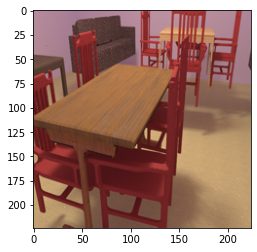

In [161]:
plt.imshow(im_1)

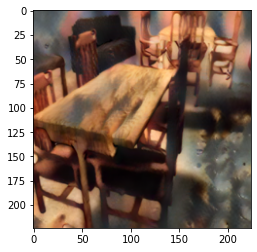

In [162]:
plt.imshow(im_2)

In [163]:
from PIL import Image
import numpy as np

In [164]:
im_mask = (np.ones(im_1.shape)*255).astype('uint8')

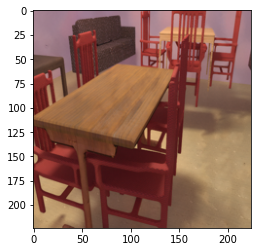

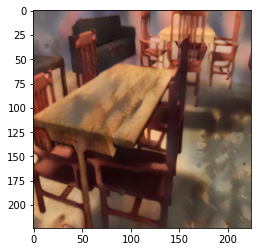

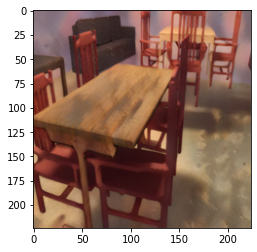

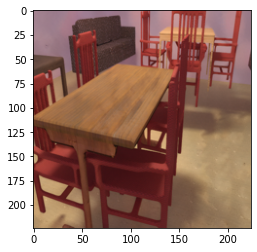

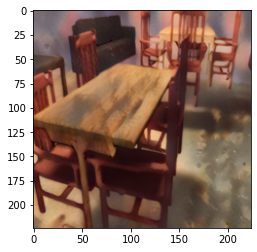

In [166]:
for i in range(5):
    alpha = np.random.uniform(0,1)
    out = (alpha*im_1 + (1-alpha)*im_2).astype('uint8')
    plt.imshow(out)
    plt.show()

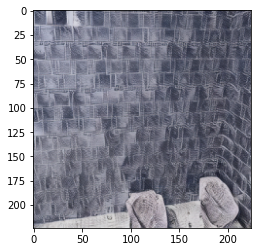

In [126]:
plt.imshow(out)

In [80]:
import cv2

In [81]:
center = (112,112)

In [77]:
out_2 = cv2.seamlessClone(im_1, im_2, im_mask, center, cv2.NORMAL_CLONE)

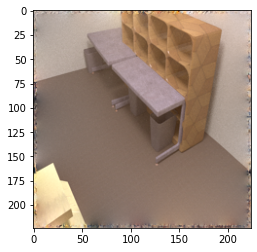

In [78]:
plt.imshow(out_2)

In [195]:
norm_out = np.array(255*out/torch.max(out)).astype('uint8')

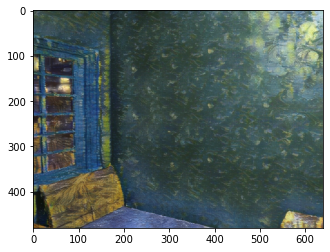

In [196]:
plt.imshow(norm_out)

In [146]:
im_1 = np.array(image_1)
im_2 = np.array(image_2)

In [104]:
im_mask = (np.ones(im_1.shape)*255).astype('uint8')

In [105]:
center = (112,112)

In [106]:
import cv2

In [107]:
output = cv2.seamlessClone(im_1, im_2, im_mask, center, cv2.MIXED_CLONE)

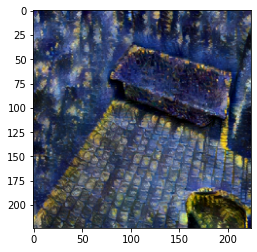

In [108]:
plt.imshow(output)

In [107]:
import numpy as np

In [140]:
im_mask = (np.ones(im_2.shape)*255).astype('uint8')

In [121]:
im_mask = (np.ones((240,320,3))*255).astype('uint8')

In [141]:
im_mask.shape

(240, 320, 3)

In [142]:
center = (240,320)

In [145]:
im_mask_2 = cv2.seamlessClone(im_1, im_2, im_mask, (320,240), cv2.NORMAL_CLONE)

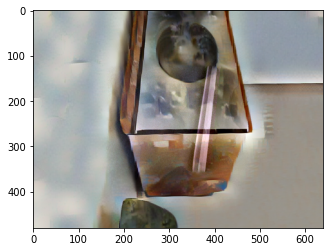

In [146]:
plt.imshow(image_2)

In [10]:
((data[0][0].shape)/2).astype('uint8')

TypeError: unsupported operand type(s) for /: 'tuple' and 'int'

In [ ]:
import numpy as np

In [26]:
from numpy import dtype

In [29]:
data[2][0].dtype

dtype('float64')

## data[1]

In [6]:
data[0][0].shape

torch.Size([480, 640, 3])

In [8]:
# output = cv2.seamlessClone(src, dst, mask, center, flags)

In [10]:
len(data)

6

In [16]:
%matplotlib inline

# Poisson Blending

In [29]:
import numpy as np
import cv2

In [98]:
im_1 = (255*np.array(data[0][3].permute(1,2,0))).astype('uint8')    
im_2 = (255*np.array(data[2][2].permute(1,2,0))).astype('uint8')    

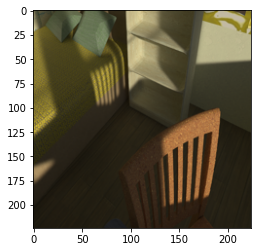

In [99]:
plt.imshow(im_1)
plt.show()

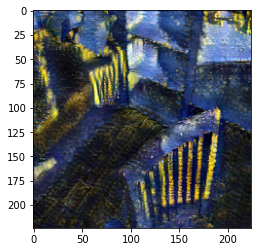

In [100]:
plt.imshow(im_2)
plt.show()

In [101]:
im_mask = (np.ones(im_1.shape)*255).astype('uint8')

In [102]:
center= (112,112)

In [103]:
# im_1.shape

In [125]:
output = cv2.seamlessClone(im_1, im_2, im_mask, center, cv2.NORMAL_CLONE)

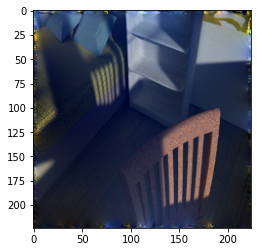

In [126]:
plt.imshow(output)
plt.show()

In [145]:
# output_2 = cv2.addWeighted(im_1, 0.5, im_2, 0.5, 0.0)


In [146]:
# plt.imshow(output_2)
# plt.show()

In [97]:
# from PIL import Image
import numpy as np

In [17]:
%matplotlib inline

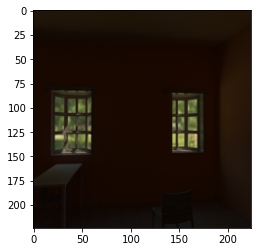

In [18]:
plt.imshow(data[0][1].permute(1,2,0))

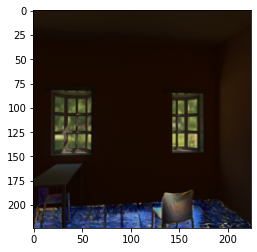

In [19]:
plt.imshow(data[2][1].permute(1,2,0))

In [15]:
%matplotlib inline

In [25]:
import numpy as np
# np.unique(data[2][0])

In [17]:
%matplotlib inline

In [18]:
def compose_images(domain_image_pil, style_image_pil, label_array, category_to_replace = None):
    
    domain_image = np.array(domain_image_pil)
    style_image = np.array(style_image_pil)
    if not category_to_replace:
        u, count = np.unique(mask, return_counts=True)
        count_sort_ind = np.argsort(-count)
        category_to_replace = u[0]
#         possible_labels = u[count_sort_ind][:2]
#         category_to_replace = random.choice(possible_labels)
    cat_mask = (label_array == category_to_replace).astype('uint8')
    non_cat_mask = (label_array != category_to_replace).astype('uint8')

    cat_region = cv2.bitwise_and(style_image, style_image, mask=cat_mask)
    non_cat_region = cv2.bitwise_and(domain_image, domain_image, mask=non_cat_mask)
    composed_image = cat_region + non_cat_region
    return composed_image

In [19]:
# plt.imshow(label_arr==4)

In [20]:
import cv2

In [21]:
from PIL import Image

In [22]:
image = Image.fromarray(np.array(data[0][0]))

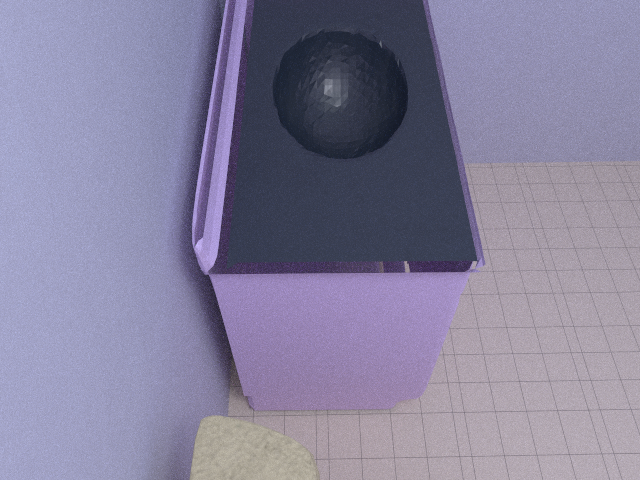

In [25]:
image

In [23]:
image_2 = Image.fromarray(np.array(data[1][0]))

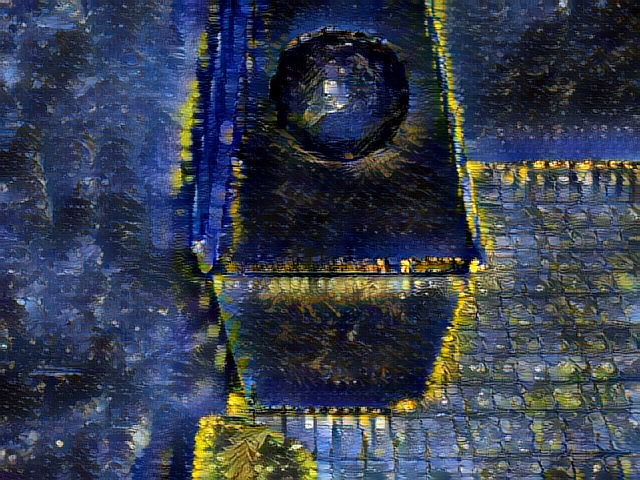

In [24]:
image_2

In [27]:
label_arr = np.array(data[2][0])

In [28]:
# label_arr

In [29]:
# plt.imshow(label_arr==5)

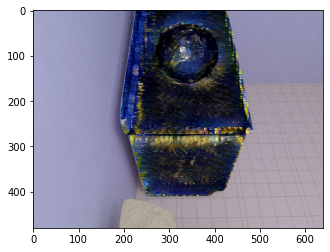

In [30]:
plt.imshow(compose_images(image,image_2,label_arr, 42))

In [7]:
path = '/n/pfister_lab2/Lab/spandan/contextual_domain_adaptation/openrooms/labels_main_xml1/scene0001_00/imsemLabel_1.npy'

In [8]:
import numpy as np
mask = np.load(path)

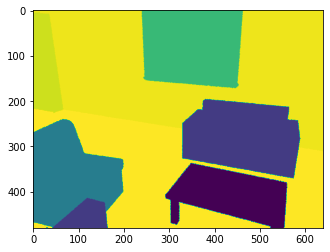

In [27]:
plt.imshow(mask)

In [41]:
u, count = np.unique(mask, return_counts=True)
count_sort_ind = np.argsort(-count)
poss = u[count_sort_ind][:3]

In [43]:
import random
random.choice(poss)

43

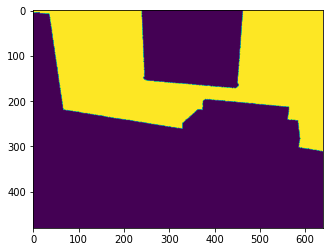

In [40]:
plt.imshow(mask==43)

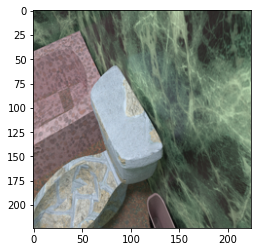

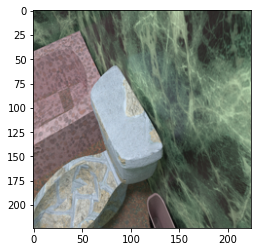

In [2]:
NUM_CLASSES = dataset.NUM_CLASSES
cfg.num_classes = NUM_CLASSES
save_config(cfg, args.outdir)
print(cfg)

model = Model.from_config(cfg)

assert(model.TARGET_IMAGE_SIZE == model.CONTEXT_IMAGE_SIZE == dataset.image_size), "Image size from the dataset is not compatible with the encoder."

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

optimizer = torch.optim.Adam(model.parameters(), lr=cfg.learning_rate)

if cfg.imbalance_reweighting:
    class_weights = torch.true_divide(dataset.relative_annotation_counts.max(), dataset.relative_annotation_counts)
    criterion = nn.CrossEntropyLoss(weight= class_weights.to(device))
else:
    criterion = nn.CrossEntropyLoss()

criterion_2 = SupConLoss(temperature=0.1) 
criterion_3 = torch.nn.MSELoss()

Hard mining set to:none
Using materials: ['mainDiffMat_xml1_arbitrary_scannet', 'main_xm1_arbitrary_1']
Hotswapped material loader being used.
-------------------------------
Annotation Counts
-------------------------------
chair                     33800
cabinet                    9557
bathtub                    5745
desk                       8890
bookshelf                  6076
file_cabinet               2130
window                    39542
door                       8146
bed                        3219
table                     19147
lamp                       2519
trash_bin                  3709
bag                        1175
sofa                       5765
washing_machine             255
basket                     1034
dishwasher                  149
monitor                    4164
printer                     619
laptop                      284
microwave                   338
telephone                    10
computer_keyboard           231
bench                       384
counter

/n/home05/smadan/.conda/envs/domain_adaptation/lib/python3.8/site-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [3]:
for data in dataloader:
    break

In [12]:
image = Image.open(image_path)
image = image.convert("RGB")

image_2 = Image.open(image_path_2)
image_2 = image_2.convert("RGB")

############ Compose ################################
label_arr = np.load(label_map_path)

IndentationError: unexpected indent (422488209.py, line 2)

In [11]:
def compose_images(domain_image_pil, style_image_pil, label_array, category_to_replace = None):
    
    domain_image = np.array(domain_image_pil)
    style_image = np.array(style_image_pil)
    if not category_to_replace:
        u, count = np.unique(mask, return_counts=True)
        count_sort_ind = np.argsort(-count)
        category_to_replace = u[0]
#         possible_labels = u[count_sort_ind][:2]
#         category_to_replace = random.choice(possible_labels)
    print()
    cat_mask = (label_array == category_to_replace).astype('uint8')
    non_cat_mask = (label_array != category_to_replace).astype('uint8')

    cat_region = cv2.bitwise_and(style_image, style_image, mask=cat_mask)
    non_cat_region = cv2.bitwise_and(domain_image, domain_image, mask=non_cat_mask)
    composed_image = cat_region + non_cat_region
    return composed_image

('/n/pfister_lab2/Lab/spandan/contextual_domain_adaptation/openrooms/labels_main_xml1//scene0106_01/imsemLabel_4.npy',
 '/n/pfister_lab2/Lab/spandan/contextual_domain_adaptation/openrooms/labels_main_xml1//scene0082_00/imsemLabel_4.npy',
 '/n/pfister_lab2/Lab/spandan/contextual_domain_adaptation/openrooms/labels_main_xml1//scene0142_00/imsemLabel_15.npy',
 '/n/pfister_lab2/Lab/spandan/contextual_domain_adaptation/openrooms/labels_main_xml1//scene0597_00/imsemLabel_4.npy')

In [7]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.imshow(data[0][1].permute(1,2,0))
# plt.show()

In [8]:
# plt.imshow(data[2][1].permute(1,2,0))
# plt.show()

In [8]:
# data[0]

In [3]:
if cfg.checkpoint is not None:
    print("Initializing from checkpoint {}".format(cfg.checkpoint))
    checkpoint = torch.load(cfg.checkpoint, map_location="cpu")
    model.load_state_dict(checkpoint['model_state_dict'])
    model.to(device)
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    start_epoch = checkpoint['epoch'] + 1
else:
    print("No checkpoint was passed.")
    model.to(device)
    start_epoch = 1

# Tensorboard
writer = SummaryWriter(log_dir=os.path.join(args.outdir, "runs/{date:%Y-%m-%d_%H%M}".format(date=datetime.datetime.now())))
# context_images = torch.vstack((info_1[0], info_2[0]))
# target_images = torch.vstack((info_1[1], info_2[1]))
# bbox = torch.vstack((info_1[2], info_2[2]))
# labels = torch.hstack((info_1[3], info_2[3]))
context_images, target_images, context_images_2, target_images_2, bbox, labels = iter(dataloader).next()
context_images.shape
writer.add_images("context_image_batch", context_images) # add example context image batch to tensorboard log
writer.add_images("target_image_batch", target_images) # add example target image batch to tensorboard log
with warnings.catch_warnings(): # add_graph method is known to issue a warning
    warnings.simplefilter("ignore")
    writer.add_graph(model, input_to_model=[context_images.to(device), target_images.to(device), bbox.to(device)]) # add model graph to tensorboard log

accuracy_logger_main_branch = AccuracyLogger(dataset.idx2label)
accuracy_logger_uncertainty_branch = AccuracyLogger(dataset.idx2label)

Initializing from checkpoint output_openrooms/style_training_8/checkpoint_7.tar


FileNotFoundError: Caught FileNotFoundError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/n/home05/smadan/.conda/envs/domain_adaptation/lib/python3.8/site-packages/torch/utils/data/_utils/worker.py", line 287, in _worker_loop
    data = fetcher.fetch(index)
  File "/n/home05/smadan/.conda/envs/domain_adaptation/lib/python3.8/site-packages/torch/utils/data/_utils/fetch.py", line 44, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/n/home05/smadan/.conda/envs/domain_adaptation/lib/python3.8/site-packages/torch/utils/data/_utils/fetch.py", line 44, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/net/coxfs01/srv/export/coxfs01/pfister_lab2/share_root/Lab/spandan/contextual_domain_adaptation/WhenPigsFlyContext/core/dataset_hotswapped_composed.py", line 124, in __getitem__
    image_2 = Image.open(image_path_2)
  File "/n/home05/smadan/.conda/envs/domain_adaptation/lib/python3.8/site-packages/PIL/Image.py", line 2968, in open
    fp = builtins.open(filename, "rb")
FileNotFoundError: [Errno 2] No such file or directory: '/n/pfister_lab2/Lab/spandan/contextual_domain_adaptation/openrooms/mainDiffMat_xml1_arbitrary_domain_B//scene0282_01/im_9.png'


In [ ]:
model.train() # set train mode
accuracy_logger_main_branch.reset() # reset accuracy logger every epoch
accuracy_logger_uncertainty_branch.reset()

In [5]:
cfg.uncertainty_gate_type

'learned'

In [6]:
%matplotlib inline

In [7]:
# normed_ou

In [5]:
for i, (context_images, target_images, context_images_2, target_images_2, bbox, labels_cpu) in enumerate(dataloader):
    context_images = context_images.to(device)
    target_images = target_images.to(device)
    context_images_2 = context_images_2.to(device)
    target_images_2 = target_images_2.to(device)
    
    bbox = bbox.to(device)
    labels = labels_cpu.to(device) 
    
    context_images_all = torch.cat([context_images, context_images_2], dim=0)
    target_images_all = torch.cat([target_images, target_images_2], dim=0)
    bbox_all = torch.cat([bbox, bbox], dim=0)
    labels_all = torch.cat([labels, labels], dim=0)
    
    output_uncertainty_branch , output_main_branch, output_weighted, uncertainty = model(context_images_all, target_images_all, bbox_all)

    f1, f2 = torch.split(output_main_branch, [args.batch_size, args.batch_size], dim=0)
    features = torch.cat([f1.unsqueeze(1), f2.unsqueeze(1)], dim=1)
    normalized_features = F.normalize(features, dim = 2)
    # backpropagation through both branches
    optimizer.zero_grad(set_to_none=True)

    if cfg.uncertainty_gate_type == "learned" or cfg.uncertainty_gate_type == "learned_metric":
        loss_uncertainty_estimator = criterion(output_weighted, labels_all)
        loss_uncertainty_estimator.backward(retain_graph=True)    


    loss_uncertainty_branch = criterion(output_uncertainty_branch, labels_all)
    loss_uncertainty_branch.backward(retain_graph=True)
    
    loss_main_branch = criterion(output_main_branch, labels_all)
    loss_contrastive = criterion_2(normalized_features, labels)
    overall_main_loss = loss_main_branch + 0.5 * loss_contrastive
    print(loss_contrastive.item())
    overall_main_loss.backward()
    optimizer.step()

KeyboardInterrupt: 

In [9]:
overall_main_loss

tensor(5.3594, device='cuda:0', grad_fn=<AddBackward0>)